<a href="https://colab.research.google.com/github/marinarivosecchi/marinarivosecchi/blob/main/Molotov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Load drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation


In [ ]:
# Load data

df1 = pd.read_csv('/content/drive/MyDrive/Programacion/Molotov/entretien_data_analyse/channel.csv').iloc[:, 1:]
channel_data = df1

df2 = pd.read_csv('/content/drive/MyDrive/Programacion/Molotov/entretien_data_analyse/subscriptions.csv').iloc[:, 1:]
subscriptions_data = df2

df3 = pd.read_csv('/content/drive/MyDrive/Programacion/Molotov/entretien_data_analyse/users.csv').iloc[:, 1:]
users_data = df3

df4 = pd.read_csv('/content/drive/MyDrive/Programacion/Molotov/entretien_data_analyse/watch.csv').iloc[:, 1:]
watch_data = df4

In [ ]:
channel_data.head()

,NAME,CHANNEL_ID
0,chada_tv,407
1,rotana_cinema,991
2,Franceinfo,567
3,cheddar,557
4,TF1 4K,331


In [ ]:
subscriptions_data.head()

,ID,USER_ID,SUBSCRIPTION_BEGIN_DATE,SUBSCRIPTION_END_DATE,PRODUCT_NAME
0,15693516,ae741c8cac8927c28ed6ba664b92e21790451a40,2021-10-30 09:22:45,2022-10-30 02:00:00,Molotov Plus
1,29874774,108fa3ba55652192ec5e5228c9ad3046cae83a95,2023-06-11 22:47:18,NaN,Molotov Extra
2,4560393,22e1710d834e97bced710dfefbf2f712264d08c1,2018-06-29 01:22:52,2018-07-28 05:09:38,Molotov Extended
3,28736301,7b57746a067ca784a5d5520706b9032df7249667,2023-01-30 20:49:17,2023-04-30 20:49:14,Molotov Extra
4,30053859,d9a382d5c47234795e7cb2b12218032142cb5c10,2023-07-06 07:10:53,2023-08-06 02:00:00,Molotov Giga


In [ ]:
users_data.head()

,ID,BIRTHDAY,ACCOUNT_CREATION_DATE
0,e5e47be85a5c2d93e87cc00dfeb6f591fad72db2,1996-12-04,2017-10-14 00:43:16
1,dd2628cb469d58c654fac74aa74d36a1e67d7279,1997-05-03,2017-04-27 21:25:49
2,91fb3d1ac537671dd45614892c5d521f28a0121f,2002-10-05,2017-08-29 15:15:06
3,9b490bc7ac99e822e36d13b7377e649c76a4a95a,1976-06-28,2018-07-03 18:51:51
4,bbe6cc5d916a41dacbe1abfcece887e31b52cda6,1976-12-19,2018-11-06 18:34:31


In [ ]:
watch_data.head()

,DATE_DAY,USER_ID,DEVICE_TYPE,PROGRAM_KIND,ASSET_TYPE,DURATION,CHANNEL_ID,EVENT_ID
0,2022-11-20,719b8afd09296c39ffc1ac593c022147cba98f0b,tv,Culture,live,280,195.0,1812653.0
1,2022-11-20,1dd2019130b3d63f0633b8a5d8615d3e25838df3,tv,Informations,live,120,209.0,1418857.0
2,2022-11-20,a20244708aa32f9b0ed08db6d6e642c1d886c5b3,phone,Séries,live,526,201.0,413864.0
3,2022-11-20,6d2db5d98f7edeabc0dbf502fcc36ec7de2170b2,phone,Séries,live,200,209.0,1836965.0
4,2022-11-20,1d19df4eba5845b4c888f0b21ec3bdcc0ea0567d,tv,Informations,live,480,383.0,2207387.0


In [ ]:
channel_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NAME        379 non-null    object
 1   CHANNEL_ID  380 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ KB


In [ ]:
channel_data['NAME'] = channel_data['NAME'].astype('string')
channel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NAME        379 non-null    string
 1   CHANNEL_ID  380 non-null    int64 
dtypes: int64(1), string(1)
memory usage: 6.1 KB


In [ ]:
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18946 entries, 0 to 18945
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       18946 non-null  int64 
 1   USER_ID                  18946 non-null  object
 2   SUBSCRIPTION_BEGIN_DATE  18946 non-null  object
 3   SUBSCRIPTION_END_DATE    14616 non-null  object
 4   PRODUCT_NAME             18946 non-null  object
dtypes: int64(1), object(4)
memory usage: 740.2+ KB


In [ ]:
subscriptions_data['USER_ID'] = subscriptions_data['USER_ID'].astype('string')
subscriptions_data['SUBSCRIPTION_BEGIN_DATE'] = pd.to_datetime(subscriptions_data['SUBSCRIPTION_BEGIN_DATE'])
subscriptions_data['SUBSCRIPTION_END_DATE'] = pd.to_datetime(subscriptions_data['SUBSCRIPTION_END_DATE'])
subscriptions_data['PRODUCT_NAME'] = subscriptions_data['PRODUCT_NAME'].astype('string')

subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18946 entries, 0 to 18945
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       18946 non-null  int64         
 1   USER_ID                  18946 non-null  string        
 2   SUBSCRIPTION_BEGIN_DATE  18946 non-null  datetime64[ns]
 3   SUBSCRIPTION_END_DATE    14616 non-null  datetime64[ns]
 4   PRODUCT_NAME             18946 non-null  string        
dtypes: datetime64[ns](2), int64(1), string(2)
memory usage: 740.2 KB


In [ ]:
users_data['ID'] = users_data['ID'].astype('string')
users_data['BIRTHDAY'] = pd.to_datetime(users_data['BIRTHDAY'])
users_data['ACCOUNT_CREATION_DATE'] = pd.to_datetime(users_data['ACCOUNT_CREATION_DATE'])

users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42246 entries, 0 to 42245
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     42246 non-null  string        
 1   BIRTHDAY               39589 non-null  datetime64[ns]
 2   ACCOUNT_CREATION_DATE  42246 non-null  datetime64[ns]
dtypes: datetime64[ns](2), string(1)
memory usage: 990.3 KB


In [ ]:
watch_data['DATE_DAY'] = pd.to_datetime(watch_data['DATE_DAY'])
watch_data['USER_ID'] = watch_data['USER_ID'].astype('string')
watch_data['DEVICE_TYPE'] = watch_data['DEVICE_TYPE'].astype('string')
watch_data['PROGRAM_KIND'] = watch_data['PROGRAM_KIND'].astype('string')
watch_data['ASSET_TYPE'] = watch_data['ASSET_TYPE'].astype('string')
watch_data['DURATION'] = watch_data['DURATION'].astype('float64')
watch_data['CHANNEL_ID'] = watch_data['CHANNEL_ID'].astype('float64')
watch_data['EVENT_ID'] = watch_data['EVENT_ID'].fillna(0)
watch_data['EVENT_ID'] = watch_data['EVENT_ID'].astype('int64')

watch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237205 entries, 0 to 237204
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DATE_DAY      237205 non-null  datetime64[ns]
 1   USER_ID       237204 non-null  string        
 2   DEVICE_TYPE   237202 non-null  string        
 3   PROGRAM_KIND  237205 non-null  string        
 4   ASSET_TYPE    237200 non-null  string        
 5   DURATION      237205 non-null  float64       
 6   CHANNEL_ID    237204 non-null  float64       
 7   EVENT_ID      237205 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 14.5 MB


In [ ]:
# Check for duplicates
duplicates_channel = channel_data.duplicated().sum()
print("Number of duplicate rows in Channel:", duplicates_channel)

# Check for null or missing values
null_values_channel = channel_data.isnull().sum()
print("\nNull values in Channel:")
print(null_values_channel)

# Check data types
channel_data_types = channel_data.dtypes
print("\nData types in Channel:")
print(channel_data_types)

# Check unique values
unique_values_channel = channel_data.nunique()
print("\nUnique values in Channel:")
print(unique_values_channel)

# Explore descriptive statistics
channel_statistics = channel_data.describe()
print("\nDescriptive statistics in Channel:")
print(channel_statistics)

Number of duplicate rows in Channel: 0

Null values in Channel:
NAME          1
CHANNEL_ID    0
dtype: int64

Data types in Channel:
NAME          string
CHANNEL_ID     int64
dtype: object

Unique values in Channel:
NAME          379
CHANNEL_ID    380
dtype: int64

Descriptive statistics in Channel:
        CHANNEL_ID
count   380.000000
mean    892.373684
std     493.479699
min     111.000000
25%     408.500000
50%     854.000000
75%    1385.500000
max    1639.000000


In [ ]:
# Check for duplicates
duplicates_subscription = subscriptions_data.duplicated().sum()
print("Number of duplicate rows in Subscription:", duplicates_subscription)

# Check for null or missing values
subscription_null_values = subscriptions_data.isnull().sum()
print("\nNull values in Subscription:")
print(subscription_null_values)

# Check data types
subscription_data_types = subscriptions_data.dtypes
print("\nData types in Subscription:")
print(subscription_data_types)

# Check unique values
unique_subscription_values = subscriptions_data.nunique()
print("\nUnique values in Subscription:")
print(unique_subscription_values)

# Explore descriptive statistics
subscription_statistics = subscriptions_data.describe()
print("\nDescriptive statistics in Subscription:")
print(subscription_statistics)

Number of duplicate rows in Subscription: 0

Null values in Subscription:
ID                            0
USER_ID                       0
SUBSCRIPTION_BEGIN_DATE       0
SUBSCRIPTION_END_DATE      4330
PRODUCT_NAME                  0
dtype: int64

Data types in Subscription:
ID                                  int64
USER_ID                            string
SUBSCRIPTION_BEGIN_DATE    datetime64[ns]
SUBSCRIPTION_END_DATE      datetime64[ns]
PRODUCT_NAME                       string
dtype: object

Unique values in Subscription:
ID                         18944
USER_ID                     8768
SUBSCRIPTION_BEGIN_DATE    18543
SUBSCRIPTION_END_DATE      12626
PRODUCT_NAME                   4
dtype: int64

Descriptive statistics in Subscription:
                 ID
count  1.894600e+04
mean   2.025146e+07
std    8.368229e+06
min    1.989870e+05
25%    1.284758e+07
50%    2.163688e+07
75%    2.826387e+07
max    3.150704e+07


In [ ]:
# Check for duplicates
user_duplicates = users_data.duplicated().sum()
print("Number of duplicate rows in User:", user_duplicates)

# Check for null or missing values
user_null_values = users_data.isnull().sum()
print("\nNull values in User:")
print(user_null_values)

# Check data types
user_data_types = users_data.dtypes
print("\nData types in User:")
print(user_data_types)

# Check unique values
user_unique_values = users_data.nunique()
print("\nUnique values in User:")
print(user_unique_values)

# Explore descriptive stats
user_statistics = users_data.describe()
print("\nDescriptive statistics in User:")
print(user_statistics)

Number of duplicate rows in User: 0

Null values in User:
ID                          0
BIRTHDAY                 2657
ACCOUNT_CREATION_DATE       0
dtype: int64

Data types in User:
ID                               string
BIRTHDAY                 datetime64[ns]
ACCOUNT_CREATION_DATE    datetime64[ns]
dtype: object

Unique values in User:
ID                       42246
BIRTHDAY                 18228
ACCOUNT_CREATION_DATE    42239
dtype: int64

Descriptive statistics in User:
                                              ID             BIRTHDAY  \
count                                      42246                39589   
unique                                     42246                18228   
top     e5e47be85a5c2d93e87cc00dfeb6f591fad72db2  1990-02-19 00:00:00   
freq                                           1                   10   
first                                        NaN  1800-01-01 00:00:00   
last                                         NaN  2010-11-03 00:00:00   

       AC

In [ ]:
# Check for duplicates
duplicates_watch = watch_data.duplicated().sum()
print("Number of duplicate rows in Watch:", duplicates_watch)

# Check for null or missing values
watch_null_values = watch_data.isnull().sum()
print("\nNull values in Watch:")
print(watch_null_values)

# Check data types
watch_data_types = watch_data.dtypes
print("\nData types in Watch:")
print(watch_data_types)

# Check unique values
watch_unique_values = watch_data.nunique()
print("\nUnique values in Watch:")
print(watch_unique_values)

# Explore descriptive statistics
watch_statistics = watch_data.describe()
print("\nDescriptive statistics in Watch:")
print(watch_statistics)

Number of duplicate rows in Watch: 0

Null values in Watch:
DATE_DAY        0
USER_ID         1
DEVICE_TYPE     3
PROGRAM_KIND    0
ASSET_TYPE      5
DURATION        0
CHANNEL_ID      1
EVENT_ID        0
dtype: int64

Data types in Watch:
DATE_DAY        datetime64[ns]
USER_ID                 string
DEVICE_TYPE             string
PROGRAM_KIND            string
ASSET_TYPE              string
DURATION               float64
CHANNEL_ID             float64
EVENT_ID                 int64
dtype: object

Unique values in Watch:
DATE_DAY            12
USER_ID          12428
DEVICE_TYPE          5
PROGRAM_KIND         8
ASSET_TYPE           5
DURATION         11497
CHANNEL_ID         225
EVENT_ID        225606
dtype: int64

Descriptive statistics in Watch:
            DURATION     CHANNEL_ID      EVENT_ID
count  237205.000000  237204.000000  2.372050e+05
mean     1893.484547     243.814868  1.186665e+06
std      3505.327767     242.192999  6.844893e+05
min       -10.000000     115.000000  0.0000

# Devices analysis


In [ ]:
# Values for device type
print(watch_data['DEVICE_TYPE'].unique())

<StringArray>
['tv', 'phone', 'desktop', 'tablet', <NA>, 'smart_display']
Length: 6, dtype: string


In [ ]:
# Total number of users
total_users = users_data.shape[0]
total_sessions = watch_data.shape[0]

# Group by device type
watch_grouped_device = watch_data.groupby("DEVICE_TYPE")

# Dictionary to save results
results = {}

# Calculate metrics for each device type
for DEVICE_TYPE in watch_grouped_device.groups.keys():

    df = watch_grouped_device.get_group(DEVICE_TYPE)
    unique_users_device = df["USER_ID"].nunique()
    sessions_device = df.shape[0]
    avg_duration = df["DURATION"].mean() / 60 # Convert a minutes
    share_users = (unique_users_device / total_users) * 100
    share_sessions = (sessions_device / total_sessions) * 100

    results[DEVICE_TYPE] = {
        "Unique users": unique_users_device,
        "Total sessions": sessions_device,
        "AVG Duration (minutes)": avg_duration,
        "Share of Users": share_users,
        "Share of Sessions": share_sessions,

    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T  # Transpose the DataFrame to have devices as rows

# Format numeric values with comma separators and no decimal places
results_df["Unique users"] = results_df["Unique users"].apply(lambda x: "{:,.0f}".format(x))
results_df["Total sessions"] = results_df["Total sessions"].apply(lambda x: "{:,.0f}".format(x))
results_df["AVG Duration (minutes)"] = results_df["AVG Duration (minutes)"].apply(lambda x: "{:,.2f}".format(x))
results_df["Share of Users"] = results_df["Share of Users"].apply(lambda x: "{:.2f}%".format(x))
results_df["Share of Sessions"] = results_df["Share of Sessions"].apply(lambda x: "{:.2f}%".format(x))

# Show results DataFrame
print(results_df.to_string(index=True))



              Unique users Total sessions AVG Duration (minutes) Share of Users Share of Sessions
desktop              1,988         34,178                  27.01          4.71%            14.41%
phone                4,154         34,706                  18.35          9.83%            14.63%
smart_display           81          1,087                  22.91          0.19%             0.46%
tablet               1,571         19,368                  25.34          3.72%             8.17%
tv                   6,661        147,863                  36.59         15.77%            62.34%


# Users that didn't use the platform

In [ ]:
# Verify if all watch_data users are in users_data

# Extract unique USER_IDs from Watch table
watch_data_cleaned = watch_data.dropna(subset=['USER_ID'])

# Check if all users who have viewed content are in the users table
all_users_in_watch = watch_data_cleaned['USER_ID'].isin(users_data['ID']).all()

if all_users_in_watch:
      print("All users who have viewed content are present in the users table.")
else:
      print("Not all users who have viewed content are present in the users table.")

All users who have viewed content are present in the users table.


In [ ]:
# Calculate the number of users who have never watched content
num_users_never_watched = total_users - len(set(watch_data['USER_ID']))

# Calculate the percentage of users who have never watched content
percentage_users_never_watched = (num_users_never_watched / total_users) * 100

# Print results
print("Users that didn't watch any content:", num_users_never_watched)
print("Total users:", total_users)
print("Percentage of users who have never watched content: {:.2f}%".format(percentage_users_never_watched))


Users that didn't watch any content: 29817
Total users: 42246
Percentage of users who have never watched content: 70.58%


# Subscriptions analysis

In [ ]:
# Read values for subscriptions

print(subscriptions_data['PRODUCT_NAME'].unique())

<StringArray>
['Molotov Plus', 'Molotov Extra', 'Molotov Extended', 'Molotov Giga']
Length: 4, dtype: string


Total Users: 42246
Active Subscribers: 3623
Canceled Subscribers: 5145
Never Subscribed: 33478
Percentage of Active Subscribers: 8.58 %
Percentage of Canceled Subscribers: 12.18 %
Percentage of Never Subscribed: 79.25 %



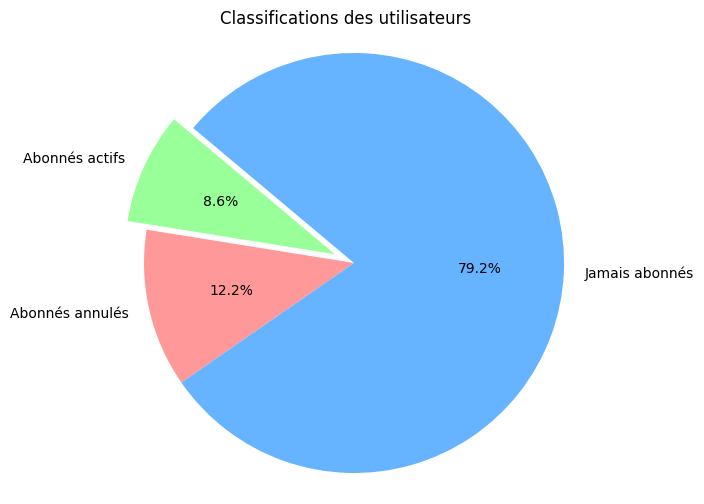

In [ ]:
# Total Users total_users

# Total Active Subscribers
active_subscribers_list = subscriptions_data[subscriptions_data['SUBSCRIPTION_END_DATE'].isnull()]['USER_ID'].unique()

# Subscribers Who Canceled
subscribers_canceled_total_list = subscriptions_data[subscriptions_data['SUBSCRIPTION_END_DATE'].notnull()]['USER_ID'].unique()
subscribers_canceled_list = set(subscribers_canceled_total_list) - set(active_subscribers_list)

# Users that never had a subscription
users_never_subscribed_list = set(users_data['ID']) - set(subscriptions_data['USER_ID'])

# Totals
total_subscribers = len(active_subscribers_list)
total_canceled_subscribers = len(subscribers_canceled_list)
total_never_subscribed = len(users_never_subscribed_list)

# Percentages
percentage_active_subscribers = (total_subscribers / total_users) * 100
percentage_canceled_subscribers = (total_canceled_subscribers / total_users) * 100
percentage_never_subscribed = (total_never_subscribed / total_users) * 100

# Mostrar resultados
print("Total Users:", total_users)
print("Active Subscribers:", total_subscribers)
print("Canceled Subscribers:", total_canceled_subscribers)
print("Never Subscribed:", total_never_subscribed)
print("Percentage of Active Subscribers:", round(percentage_active_subscribers, 2), "%")
print("Percentage of Canceled Subscribers:", round(percentage_canceled_subscribers, 2), "%")
print("Percentage of Never Subscribed:", round(percentage_never_subscribed, 2), "%")
print()

# Pie chart data
labels = ['Abonnés actifs', 'Abonnés annulés', 'Jamais abonnés']
sizes = [percentage_active_subscribers, percentage_canceled_subscribers, percentage_never_subscribed]
colors = ['#99ff99', '#ff9999', '#66b3ff']
explode = (0.1, 0, 0)  # Highlight the first slice

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Classifications des utilisateurs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show pie chart
plt.show()



Total Watch Records: 237205
Active Subscribers Watch: 2827
Canceled Subscribers Watch: 1896
Never Subscribed Watch: 7705
Percentage of Active Subscribers Watch: 22.75 %
Percentage of Canceled Subscribers Watch: 15.25 %
Percentage of Never Subscribed Watch: 61.99 %



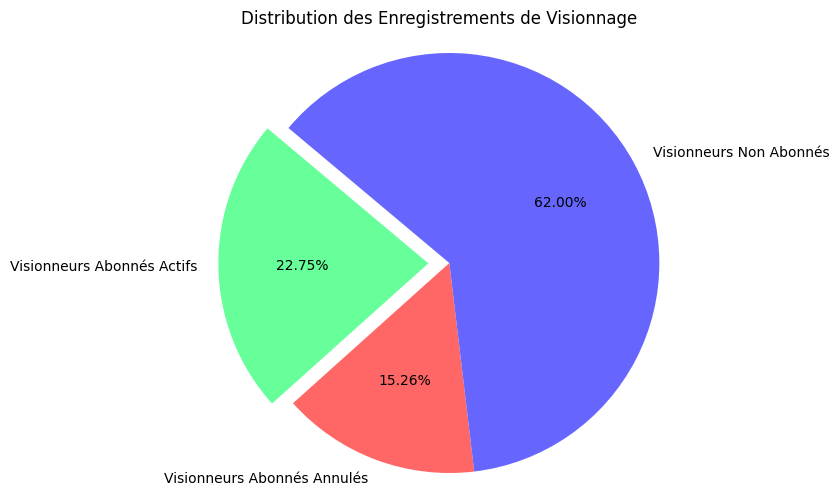

In [ ]:
# Total number of records in watch_data
total_watch_records = len(watch_data)

# Users in the watch_data table
watch_users = set(watch_data['USER_ID'])

# Users in watch_data who are Active Subscribers
active_subscribers_watch = len(set(active_subscribers_list) & watch_users)

# Users in watch_data who are Canceled Subscribers
canceled_subscribers_watch = len(set(subscribers_canceled_list) & watch_users)

# Users in watch_data who are Never Subscribed
never_subscribed_watch = len(set(users_never_subscribed_list) & watch_users)

# Percentages
percentage_active_subscribers_watch = (active_subscribers_watch / len(watch_users)) * 100
percentage_canceled_subscribers_watch = (canceled_subscribers_watch / len(watch_users)) * 100
percentage_never_subscribed_watch = (never_subscribed_watch / len(watch_users)) * 100

# Display results
print("Total Watch Records:", total_watch_records)
print("Active Subscribers Watch:", active_subscribers_watch)
print("Canceled Subscribers Watch:", canceled_subscribers_watch)
print("Never Subscribed Watch:", never_subscribed_watch)
print("Percentage of Active Subscribers Watch:", round(percentage_active_subscribers_watch, 2), "%")
print("Percentage of Canceled Subscribers Watch:", round(percentage_canceled_subscribers_watch, 2), "%")
print("Percentage of Never Subscribed Watch:", round(percentage_never_subscribed_watch, 2), "%")
print()

# Define data
labels = ['Visionneurs Abonnés Actifs', 'Visionneurs Abonnés Annulés', 'Visionneurs Non Abonnés']
sizes = [active_subscribers_watch, canceled_subscribers_watch, never_subscribed_watch]
colors = ['#66ff99', '#ff6666', '#6666ff']
explode = (0.1, 0, 0)  # Highlight the first slice

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Distribution des Enregistrements de Visionnage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()



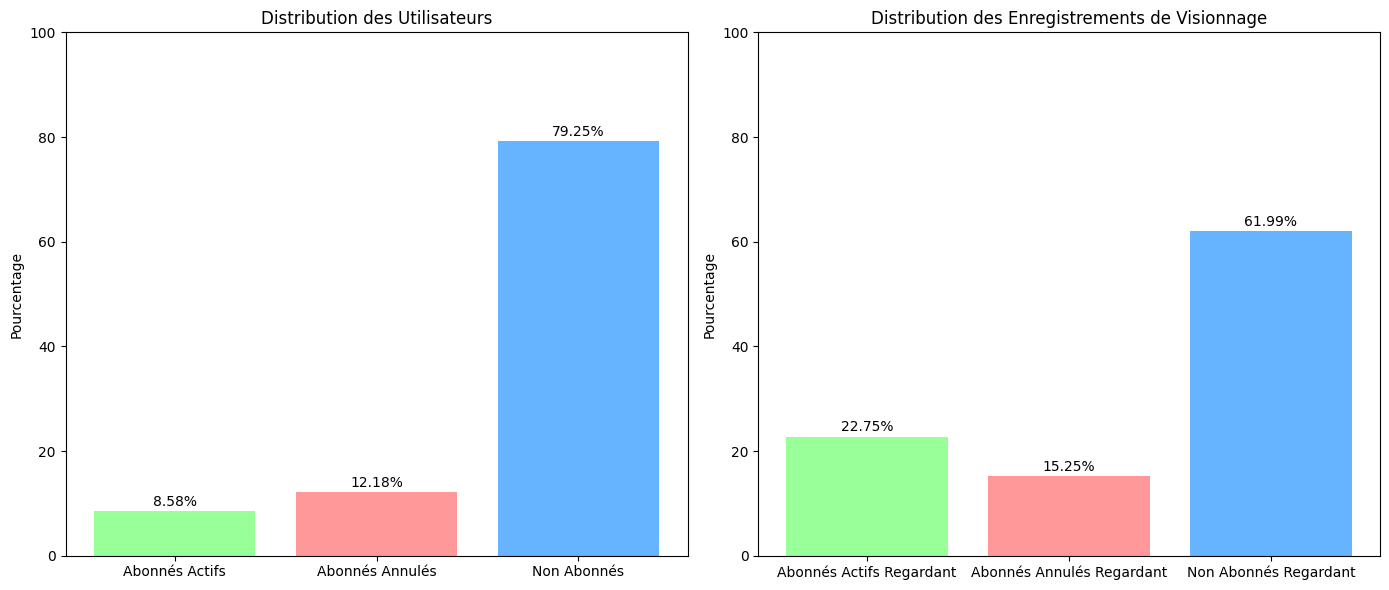

In [ ]:
import matplotlib.pyplot as plt

# Data for the first set
user_labels = ['Abonnés Actifs', 'Abonnés Annulés', 'Non Abonnés']
user_sizes = [percentage_active_subscribers, percentage_canceled_subscribers, percentage_never_subscribed]
user_colors = ['#99ff99', '#ff9999', '#66b3ff']

# Data for the second set
watch_labels = ['Abonnés Actifs Regardant', 'Abonnés Annulés Regardant', 'Non Abonnés Regardant']
watch_sizes = [percentage_active_subscribers_watch, percentage_canceled_subscribers_watch, percentage_never_subscribed_watch]
watch_colors = ['#99ff99', '#ff9999', '#66b3ff']  # Same colors as the first chart

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar chart for distribution of users
axes[0].bar(user_labels, user_sizes, color=user_colors)
axes[0].set_title('Distribution des Utilisateurs')
axes[0].set_ylabel('Pourcentage')
axes[0].set_ylim(0, 100)  # Set y-axis limit for percentage range

# Annotate percentages in the bar chart for distribution of users
for i in range(len(user_labels)):
    axes[0].text(i, user_sizes[i] + 1, f'{user_sizes[i]:.2f}%', ha='center')

# Bar chart for distribution of watch records
axes[1].bar(watch_labels, watch_sizes, color=watch_colors)
axes[1].set_title('Distribution des Enregistrements de Visionnage')
axes[1].set_ylabel('Pourcentage')
axes[1].set_ylim(0, 100)  # Set y-axis limit for percentage range

# Annotate percentages in the bar chart for distribution of watch records
for i in range(len(watch_labels)):
    axes[1].text(i, watch_sizes[i] + 1, f'{watch_sizes[i]:.2f}%', ha='center')

# Show the plots
plt.tight_layout()
plt.show()



In [ ]:
# Count the total number of users for each subscription type
total_subscription_counts = subscriptions_data['PRODUCT_NAME'].value_counts()

# Count the number of users who ended a subscription for each subscription type
cancelled_subscription_counts = subscriptions_data[subscriptions_data['SUBSCRIPTION_END_DATE'].notna()]['PRODUCT_NAME'].value_counts()

# Calculate the percentage of users who cancelled each subscription type
cancelled_subscription_percentages = (cancelled_subscription_counts / total_subscription_counts) * 100

# Calculate total subscriptions, cancellations, and active subscriptions
total_subscriptions = len(subscriptions_data)
total_cancellations = subscriptions_data['SUBSCRIPTION_END_DATE'].notna().sum()
total_active_subscriptions = total_subscriptions - total_cancellations

# Calculate percentages
percentage_cancellations = (total_cancellations / total_subscriptions) * 100
percentage_active_subscriptions = (total_active_subscriptions / total_subscriptions) * 100

print()
# Display the results in a table format
print("SUBSCRIPTION TYPE  | TOTAL USERS | CANCELLED USERS | ACTIVE USERS | CANCELLED % | ACTIVE % | ACTIVE % (of total users)")
print("-" * 110)  # Separator line
for subscription_type, total_count in total_subscription_counts.items():
    cancelled_count = cancelled_subscription_counts.get(subscription_type, 0)
    active_count = total_count - cancelled_count
    cancelled_percentage = (cancelled_count / total_count) * 100 if total_count > 0 else 0
    active_percentage = (active_count / total_count) * 100 if total_count > 0 else 0
    active_percentage_of_total_users = (active_count / total_users) * 100
    print(f"{subscription_type:<18} | {total_count:<11} | {cancelled_count:<15} | {active_count:<12} | {cancelled_percentage:>9.2f}% | {active_percentage:>8.2f}% | {active_percentage_of_total_users:>6.2f}%")



SUBSCRIPTION TYPE  | TOTAL USERS | CANCELLED USERS | ACTIVE USERS | CANCELLED % | ACTIVE % | ACTIVE % (of total users)
--------------------------------------------------------------------------------------------------------------
Molotov Plus       | 6477        | 5215            | 1262         |     80.52% |    19.48% |   2.99%
Molotov Extra      | 5049        | 3120            | 1929         |     61.79% |    38.21% |   4.57%
Molotov Giga       | 4454        | 3819            | 635          |     85.74% |    14.26% |   1.50%
Molotov Extended   | 2966        | 2462            | 504          |     83.01% |    16.99% |   1.19%


In [ ]:
# Merge Users_data and Subscriptions_data
merged_data = pd.merge(users_data, subscriptions_data, left_on='ID', right_on='USER_ID', how='inner')

# Count the number of users for each subscription type
subscription_counts = merged_data['PRODUCT_NAME'].value_counts()

# Calculate the percentage of users for each subscription type
total_users = len(merged_data)
subscription_percentages = (subscription_counts / total_users) * 100

# Display the results in a table format
print("SUBSCRIPTION TYPE     |   PERCENTAGE OF USERS")
print("-" * 50)  # Separator line
for subscription_type, count in subscription_counts.items():
    print(f"{subscription_type:<20} | {subscription_percentages[subscription_type]:.2f}%")


SUBSCRIPTION TYPE     |   PERCENTAGE OF USERS
--------------------------------------------------
Molotov Plus         | 34.19%
Molotov Extra        | 26.65%
Molotov Giga         | 23.51%
Molotov Extended     | 15.66%


## Subscriptions and cancellation analysis by date

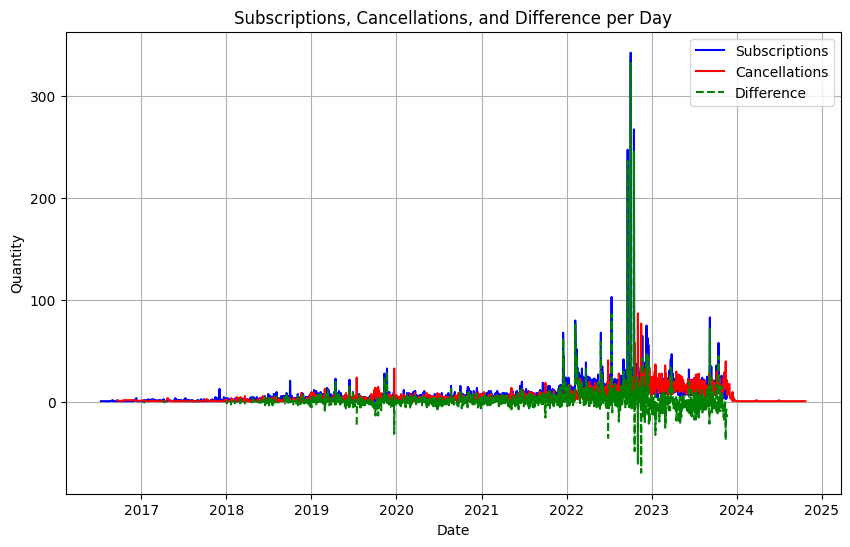

In [ ]:
# Convert the date lists to date objects
subscription_dates = subscriptions_data['SUBSCRIPTION_BEGIN_DATE'].dt.date
cancellation_dates = subscriptions_data['SUBSCRIPTION_END_DATE'].dropna().dt.date

# Convert the date lists to date objects
subscription_dates = pd.to_datetime(subscription_dates)
cancellation_dates = pd.to_datetime(cancellation_dates)

# Count subscriptions and cancellations per day
subscription_counts_daily = subscription_dates.groupby(subscription_dates.dt.to_period('D')).count()
cancellation_counts_daily = cancellation_dates.groupby(cancellation_dates.dt.to_period('D')).count()

# Calculate the difference between subscriptions and cancellations per day
difference_daily = subscription_counts_daily - cancellation_counts_daily

# Plot the curve of subscriptions, cancellations, and difference per day
plt.figure(figsize=(10, 6))
plt.plot(subscription_counts_daily.index.to_timestamp(), subscription_counts_daily.values, label='Subscriptions', color='blue')
plt.plot(cancellation_counts_daily.index.to_timestamp(), cancellation_counts_daily.values, label='Cancellations', color='red')
plt.plot(difference_daily.index.to_timestamp(), difference_daily.values, label='Difference', color='green', linestyle='--')
plt.title('Subscriptions, Cancellations, and Difference per Day')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


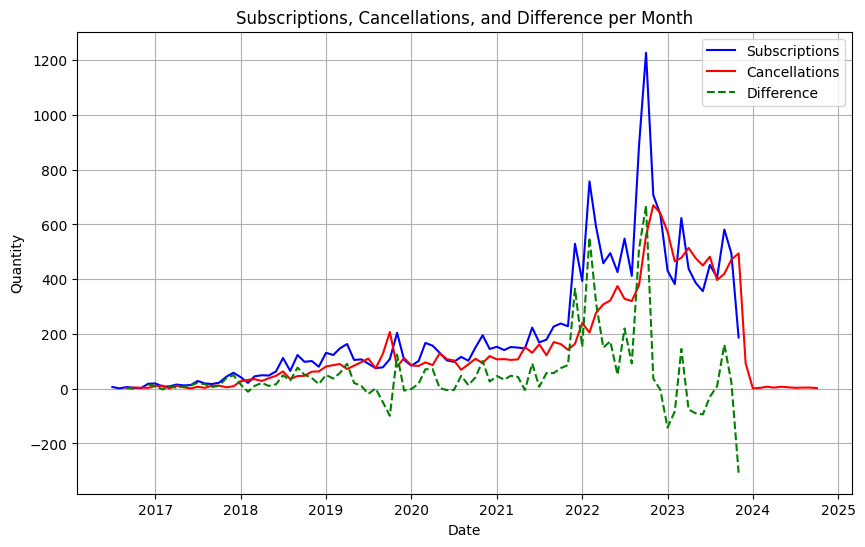

In [ ]:
# Count subscriptions and cancellations per month
subscription_counts_monthly = subscription_dates.groupby(subscription_dates.dt.to_period('M')).count()
cancellation_counts_monthly = cancellation_dates.groupby(cancellation_dates.dt.to_period('M')).count()

# Calculate the difference between subscriptions and cancellations per month
difference_monthly = subscription_counts_monthly - cancellation_counts_monthly

# Plot the curve of subscriptions, cancellations, and difference per month
plt.figure(figsize=(10, 6))
plt.plot(subscription_counts_monthly.index.to_timestamp(), subscription_counts_monthly.values, label='Subscriptions', color='blue')
plt.plot(cancellation_counts_monthly.index.to_timestamp(), cancellation_counts_monthly.values, label='Cancellations', color='red')
plt.plot(difference_monthly.index.to_timestamp(), difference_monthly.values, label='Difference', color='green', linestyle='--')
plt.title('Subscriptions, Cancellations, and Difference per Month')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

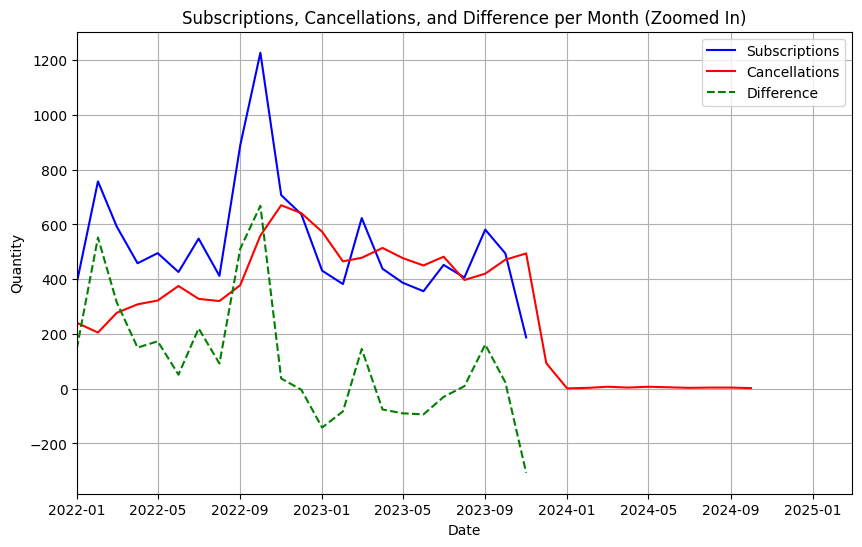

In [ ]:
# Define the start date for zooming in
start_date = pd.to_datetime('2022-01-01')  # Update the date as needed

# Plot the curve of subscriptions, cancellations, and difference per month with zooming in
plt.figure(figsize=(10, 6))
plt.plot(subscription_counts_monthly.index.to_timestamp(), subscription_counts_monthly.values, label='Subscriptions', color='blue')
plt.plot(cancellation_counts_monthly.index.to_timestamp(), cancellation_counts_monthly.values, label='Cancellations', color='red')
plt.plot(difference_monthly.index.to_timestamp(), difference_monthly.values, label='Difference', color='green', linestyle='--')
plt.title('Subscriptions, Cancellations, and Difference per Month (Zoomed In)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xlim(start_date, None)  # Set the x-axis limit to start from the defined start date
plt.legend()
plt.grid(True)
plt.show()


## Users activity after cancelling subscription

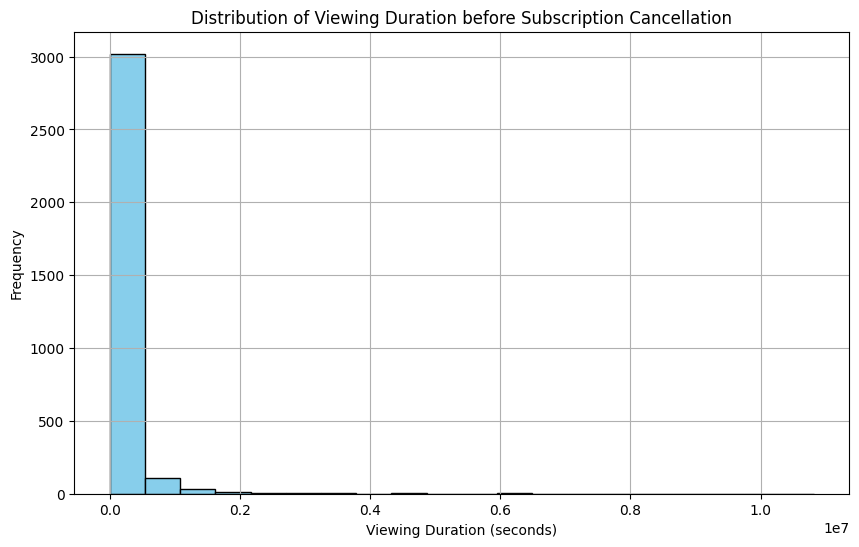

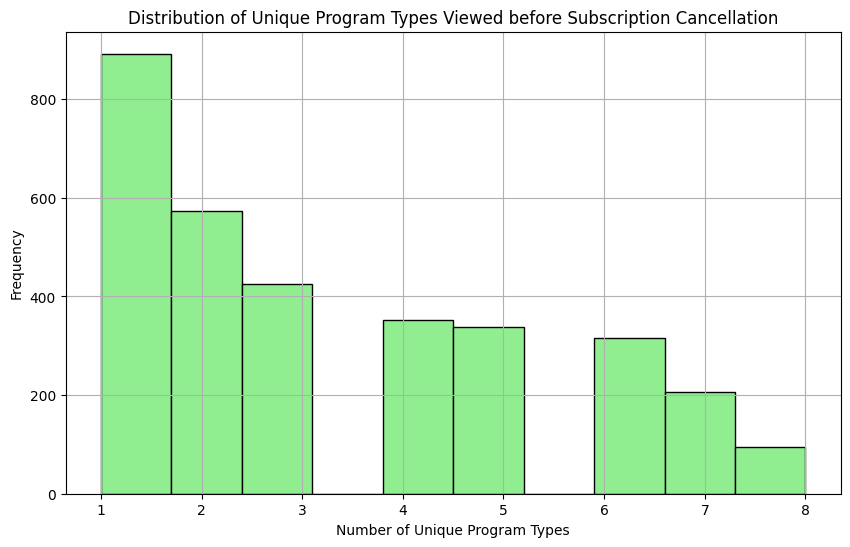

In [ ]:
# Filter users who have canceled their subscriptions
cancelled_subscriptions_users = subscriptions_data[subscriptions_data['SUBSCRIPTION_END_DATE'].notna()]

# Calculate viewing activity before cancellation
cancelled_subscriptions_watch_data = pd.merge(cancelled_subscriptions_users, watch_data, on='USER_ID', how='inner')

# Define a period of time before cancellation (60 days)
days_before_cancellation = 60

# Filter viewing activity in the time period before cancellation
cancelled_subscriptions_watch_data['DATE_DAY'] = pd.to_datetime(cancelled_subscriptions_watch_data['DATE_DAY'])
cancelled_subscriptions_watch_data = cancelled_subscriptions_watch_data[
    (cancelled_subscriptions_watch_data['SUBSCRIPTION_END_DATE'] - cancelled_subscriptions_watch_data['DATE_DAY']).dt.days <= days_before_cancellation
]

#Analyze viewing activity
activity_summary = cancelled_subscriptions_watch_data.groupby(['USER_ID']).agg({
    'DURATION': 'sum',  # Suma de la duración de visualización
    'PROGRAM_KIND': lambda x: x.nunique()  # Número de tipos únicos de programas vistos
}).reset_index()

# Plot the distribution of viewing duration
plt.figure(figsize=(10, 6))
plt.hist(activity_summary['DURATION'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Viewing Duration before Subscription Cancellation')
plt.xlabel('Viewing Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the distribution of the number of unique types of programs watched
plt.figure(figsize=(10, 6))
plt.hist(activity_summary['PROGRAM_KIND'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Unique Program Types Viewed before Subscription Cancellation')
plt.xlabel('Number of Unique Program Types')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




## Statts and preferences of subscribed users

In [ ]:
# Calculate counts and percentages for subscribed and non-subscribed users (devices, channels, content types)
merged_data = pd.merge(users_data, subscriptions_data, left_on='ID', right_on='USER_ID', how='left')
merged_data = pd.merge(merged_data, watch_data, on='USER_ID', how='left')
merged_data = pd.merge(merged_data, channel_data, on='CHANNEL_ID', how='left')

# Calcular la cantidad de usuarios suscriptos
subscribed_users = len(subscriptions_data['USER_ID'].unique())

# Calcular la cantidad de usuarios no suscriptos
non_subscribed_users = total_users - subscribed_users

# Devices
subscribed_device_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].notnull()]
                                .groupby('DEVICE_TYPE')['DEVICE_TYPE'].count().nlargest(5))
non_subscribed_device_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].isnull()]
                                    .groupby('DEVICE_TYPE')['DEVICE_TYPE'].count().nlargest(5))


subscribed_device_percentages = (subscribed_device_counts / subscribed_device_counts.sum()) * 100
non_subscribed_device_percentages = (non_subscribed_device_counts / non_subscribed_device_counts.sum()) * 100

# Channels
subscribed_channel_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].notnull()]
                             .groupby('CHANNEL_ID')['CHANNEL_ID'].count().nlargest(5))
non_subscribed_channel_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].isnull()]
                                .groupby('CHANNEL_ID')['CHANNEL_ID'].count().nlargest(5))

subscribed_channel_percentages = (subscribed_channel_counts / subscribed_channel_counts.sum()) * 100
non_subscribed_channel_percentages = (non_subscribed_channel_counts / non_subscribed_channel_counts.sum()) * 100

# Content Types
subscribed_asset_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].notnull()]
                            .groupby('ASSET_TYPE')['ASSET_TYPE'].count().nlargest(5))
non_subscribed_asset_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].isnull()]
                                .groupby('ASSET_TYPE')['ASSET_TYPE'].count().nlargest(5))

subscribed_asset_percentages = (subscribed_asset_counts / subscribed_asset_counts.sum()) * 100
non_subscribed_asset_percentages = (non_subscribed_asset_counts / non_subscribed_asset_counts.sum()) * 100


# Create the table data dictionary
table_data = {
    'Subscribed Users': [subscribed_users],
    'Non Subscribed Users': [non_subscribed_users]
}

# Add data for Top 5 Devices (format entries)
table_data['Top 5 Devices (Subscribed)'] = [f"{device}: {count} ({percentage:.2f}%)" for device, count, percentage in zip(subscribed_device_counts.index, subscribed_device_counts, subscribed_device_percentages)]
table_data['Top 5 Devices (Non Subscribed)'] = [f"{device}: {count} ({percentage:.2f}%)" for device, count, percentage in zip(non_subscribed_device_counts.index, non_subscribed_device_counts, non_subscribed_device_percentages)]

# Similar formatting for Top 5 Channels and Content Types
table_data['Top 5 Channels (Subscribed)'] = [f"{channel}: {count} ({percentage:.2f}%)" for channel, count, percentage in zip(subscribed_channel_counts.index, subscribed_channel_counts, subscribed_channel_percentages)]
table_data['Top 5 Channels (Non Subscribed)'] = [f"{channel}: {count} ({percentage:.2f}%)" for channel, count, percentage in zip(non_subscribed_channel_counts.index, non_subscribed_channel_counts, non_subscribed_channel_percentages)]
table_data['Top 5 Content type (Subscribed)'] = [f"{asset}: {count} ({percentage:.2f}%)" for asset, count, percentage in zip(subscribed_asset_counts.index, subscribed_asset_counts, subscribed_asset_percentages)]
table_data['Top 5 Content type (Non Subscribed)'] = [f"{asset}: {count} ({percentage:.2f}%)" for asset, count, percentage in zip(non_subscribed_asset_counts.index, non_subscribed_asset_counts, non_subscribed_asset_percentages)]

# Ensure all lists have at least 5 elements
for key in table_data:
    table_data[key] += [''] * (5 - len(table_data[key]))

# Create DataFrame
table_df = pd.DataFrame(table_data)

from prettytable import PrettyTable


# Separate information by category with spacing
print("USERS")  # Print category title with spacing
table = PrettyTable()
table.field_names = table_df.columns[:2]  # Select first two columns for Users
user_data = table_df[table_df.columns[:2]].values.tolist()  # Select all rows for first two columns
table.add_rows(user_data)  # Add all rows with selected columns
print(table)  # Print Users table

print("\nDEVICES")  # Print category title with spacing
table = PrettyTable()
table.field_names = table_df.columns[2:4]  # Select columns for Top 5 Devices
device_data = table_df[table_df.columns[2:4]].values.tolist()  # Select all rows for columns 2-4
table.add_rows(device_data)  # Add all rows with selected columns
print(table)  # Print Devices table

print("\nCHANNELS")  # Print category title with spacing
table = PrettyTable()
table.field_names = table_df.columns[4:6]  # Select columns for Top 5 Channels
channel_data = table_df[table_df.columns[4:6]].values.tolist()  # Select all rows for columns 4-5
table.add_rows(channel_data)  # Add all rows with selected columns
print(table)  # Print Channels table

print("\nCONTENT")  # Print category title with spacing
table = PrettyTable()
table.field_names = table_df.columns[6:]  # Select columns for Top 5 Content Types
content_data = table_df[table_df.columns[6:]].values.tolist()  # Select all rows for columns from 6th onwards
table.add_rows(content_data)  # Add all rows with selected columns
print(table)  # Print Content Types table



USERS
+------------------+----------------------+
| Subscribed Users | Non Subscribed Users |
+------------------+----------------------+
|       8768       |        10178         |
|                  |                      |
|                  |                      |
|                  |                      |
|                  |                      |
+------------------+----------------------+

DEVICES
+-----------------------------+--------------------------------+
|  Top 5 Devices (Subscribed) | Top 5 Devices (Non Subscribed) |
+-----------------------------+--------------------------------+
|     tv: 313784 (70.22%)     |    desktop: 33478 (100.00%)    |
|   desktop: 59507 (13.32%)   |                                |
|    phone: 46018 (10.30%)    |                                |
|    tablet: 26149 (5.85%)    |                                |
| smart_display: 1387 (0.31%) |                                |
+-----------------------------+--------------------------------+

CHA

# Age distribution and preferences

In [ ]:
# Total Users and Unique Watchers
# Total users: total_users
# Unique watchers: unique_users_watch_list
# Total unique watchers: unique_users_watch

# Filter for Valid Birthdays
users_data_cleaned = users_data[users_data['BIRTHDAY'].notna()]

# Calculate Age in Years
if 'AGE' not in users_data_cleaned.columns:
    users_data_cleaned['AGE'] = (pd.to_datetime('now') - pd.to_datetime(users_data_cleaned['BIRTHDAY'])).dt.days // 365

# Filter for valid ages (considering age <= 95)
users_data_cleaned = users_data_cleaned[users_data_cleaned['AGE'] <= 95]

# Check for 'AGE' Column Existence
if 'AGE' not in users_data_cleaned.columns:
    print("Warning: 'AGE' column not found in filtered data. Age group creation skipped.")
else:
    # Define age ranges for grouping
    age_ranges = [(0, 18), (18, 25), (25, 35), (35, 45), (45, 60), (60, 95)]

    # Define age labels
    age_labels = ["0-18 years", "18-25 years", "25-35 years", "35-45 years", "45-60 years", "60-95 years"]

    # Create 'AGE_GROUP' column based on age ranges and labels
    users_data_cleaned['AGE_GROUP'] = pd.cut(users_data_cleaned['AGE'], bins=[x[0] for x in age_ranges] + [95], labels=age_labels)

    # Merge watch data with user data to include age group information for each view
    watch_data_with_age = pd.merge(watch_data, users_data_cleaned[['ID', 'AGE', 'AGE_GROUP']], left_on='USER_ID', right_on='ID', how='left')

    # Initialize variables outside the loop
    top_3_content_by_age = pd.DataFrame(columns=['AGE_GROUP', 'PROGRAM_KIND', 'view_count', 'percentage'])
    top_3_devices_by_age = pd.DataFrame(columns=['AGE_GROUP', 'DEVICE_TYPE', 'view_count', 'percentage'])

    # Analyze Content Preference by Age Group
    content_preference_by_age = watch_data_with_age.groupby(['AGE_GROUP', 'PROGRAM_KIND']).size().reset_index(name='view_count')
    total_views_by_age = content_preference_by_age.groupby('AGE_GROUP')['view_count'].sum()

    for age_group in content_preference_by_age['AGE_GROUP'].unique():
        age_group_data = content_preference_by_age[content_preference_by_age['AGE_GROUP'] == age_group]
        age_group_data['percentage'] = (age_group_data['view_count'] / total_views_by_age[age_group]) * 100
        top_3_content_by_age = top_3_content_by_age.append(age_group_data.sort_values('percentage', ascending=False).head(3), ignore_index=True)

    # Analyze Device Preference by Age Group
    device_preference_by_age = watch_data_with_age.groupby(['AGE_GROUP', 'DEVICE_TYPE']).size().reset_index(name='view_count')
    total_views_by_age = device_preference_by_age.groupby('AGE_GROUP')['view_count'].sum()

    for age_group in device_preference_by_age['AGE_GROUP'].unique():
        age_group_data = device_preference_by_age[device_preference_by_age['AGE_GROUP'] == age_group]
        age_group_data['percentage'] = (age_group_data['view_count'] / total_views_by_age[age_group]) * 100
        top_3_devices_by_age = top_3_devices_by_age.append(age_group_data.sort_values('percentage', ascending=False).head(3), ignore_index=True)

    # Calculate age distribution for users
    age_distribution_users = users_data_cleaned['AGE_GROUP'].value_counts(normalize=True).sort_index() * 100

    # Calculate age distribution for watchers (assuming 'USER_ID' is in watch_data)
    age_distribution_watchers = (watch_data_with_age['AGE_GROUP']
                                  .value_counts(normalize=True)
                                  .sort_index() * 100)

    # Display Results
    print("1. Age Distribution (Percentage)")
    print()
    print("Age Group | Users (%) | Watchers (%)")
    for age_group in age_distribution_users.index:
        user_percentage = age_distribution_users.loc[age_group]
        watcher_percentage = age_distribution_watchers.get(age_group, 0)  # Handle missing values
        print(f"{age_group:<10} | {user_percentage:.2f}% | {watcher_percentage:.2f}%")
    print()
    print("2. Top 3 Content Preferences by Age Group")
    print()

    print("Age Group | Content Type 1 | Percentage 1 | Content Type 2 | Percentage 2 | Content Type 3 | Percentage 3")
    for age_group, group_data in top_3_content_by_age.groupby('AGE_GROUP'):
        print(f"{age_group:<10} | {group_data.iloc[0]['PROGRAM_KIND']:<13} | {group_data.iloc[0]['percentage']:.2f}% | {group_data.iloc[1]['PROGRAM_KIND']:<13} | {group_data.iloc[1]['percentage']:.2f}% | {group_data.iloc[2]['PROGRAM_KIND']:<13} | {group_data.iloc[2]['percentage']:.2f}%")
    print()
    print("3. Top 3 Device Preferences by Age Group")
    print()

    print("Age Group | Device Type 1 | Percentage 1 | Device Type 2 | Percentage 2 | Device Type 3 | Percentage 3")
    for age_group, group_data in top_3_devices_by_age.groupby('AGE_GROUP'):
        print(f"{age_group:<10} | {group_data.iloc[0]['DEVICE_TYPE']:<13} | {group_data.iloc[0]['percentage']:.2f}% | {group_data.iloc[1]['DEVICE_TYPE']:<13} | {group_data.iloc[1]['percentage']:.2f}% | {group_data.iloc[2]['DEVICE_TYPE']:<13} | {group_data.iloc[2]['percentage']:.2f}%")




1. Age Distribution (Percentage)

Age Group | Users (%) | Watchers (%)
0-18 years | 1.13% | 0.17%
18-25 years | 15.21% | 5.58%
25-35 years | 20.74% | 14.33%
35-45 years | 20.32% | 22.80%
45-60 years | 25.47% | 32.91%
60-95 years | 17.13% | 24.20%

2. Top 3 Content Preferences by Age Group

Age Group | Content Type 1 | Percentage 1 | Content Type 2 | Percentage 2 | Content Type 3 | Percentage 3
0-18 years | Enfants       | 27.20% | Informations  | 21.60% | Sport         | 15.20%
18-25 years | Informations  | 33.53% | Séries        | 20.23% | Enfants       | 12.95%
25-35 years | Informations  | 38.46% | Séries        | 17.22% | Sport         | 10.74%
35-45 years | Informations  | 39.54% | Séries        | 16.65% | Enfants       | 11.50%
45-60 years | Informations  | 44.88% | Séries        | 15.31% | Films         | 10.40%
60-95 years | Informations  | 48.87% | Séries        | 15.01% | Films         | 10.79%

3. Top 3 Device Preferences by Age Group

Age Group | Device Type 1 | Percentage 

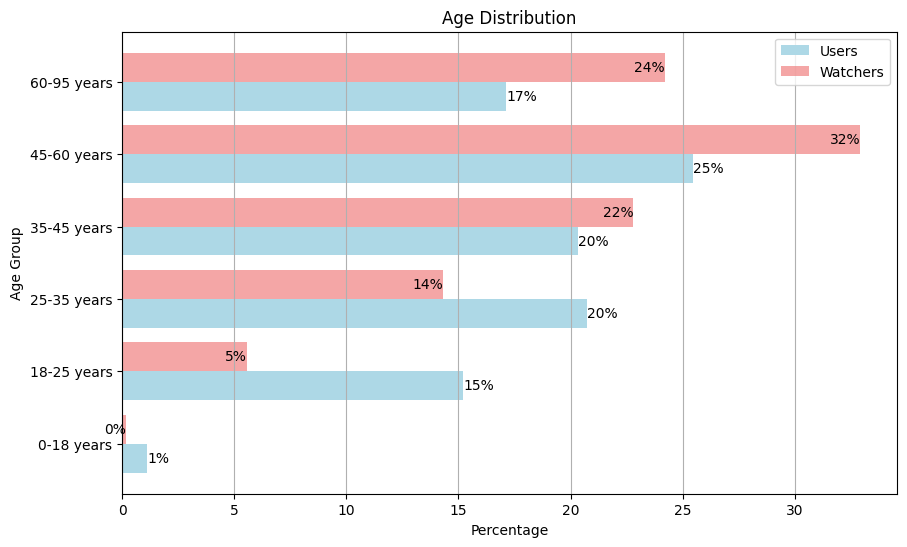

In [ ]:
# Calculate age distribution for users
age_distribution_users = users_data_cleaned['AGE_GROUP'].value_counts(normalize=True).sort_index() * 100

# Calculate age distribution for watchers (assuming 'USER_ID' is in watch_data)
age_distribution_watchers = (watch_data_with_age['AGE_GROUP']
                                .value_counts(normalize=True)
                                .sort_index() * 100)

# Set bar width
bar_width = 0.4

# Create a bar chart
plt.figure(figsize=(10, 6))

# Define the positions for the bars
positions = np.arange(len(age_distribution_users))

# Plot user age distribution
plt.barh(positions - bar_width/2, age_distribution_users, height=bar_width, color='lightblue', label='Users')

# Plot watcher age distribution
plt.barh(positions + bar_width/2, age_distribution_watchers, height=bar_width, color='lightcoral', label='Watchers', alpha=0.7)

# Add percentages for user age distribution
for i, (age_group, percentage) in enumerate(age_distribution_users.items()):
    plt.text(percentage, i - bar_width/2, f'{int(percentage)}%', ha='left', va='center', fontsize=10)

# Add percentages for watcher age distribution
for i, (age_group, percentage) in enumerate(age_distribution_watchers.items()):
    plt.text(percentage, i + bar_width/2, f'{int(percentage)}%', ha='right', va='center', fontsize=10)

# Customize the plot
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Age Distribution')
plt.legend()
plt.grid(axis='x')

# Adjust y-axis ticks and labels
plt.yticks(np.arange(len(age_distribution_users)), age_distribution_users.index)

# Show the plot
plt.show()


## Distribution of users tenure and preferences by tenure

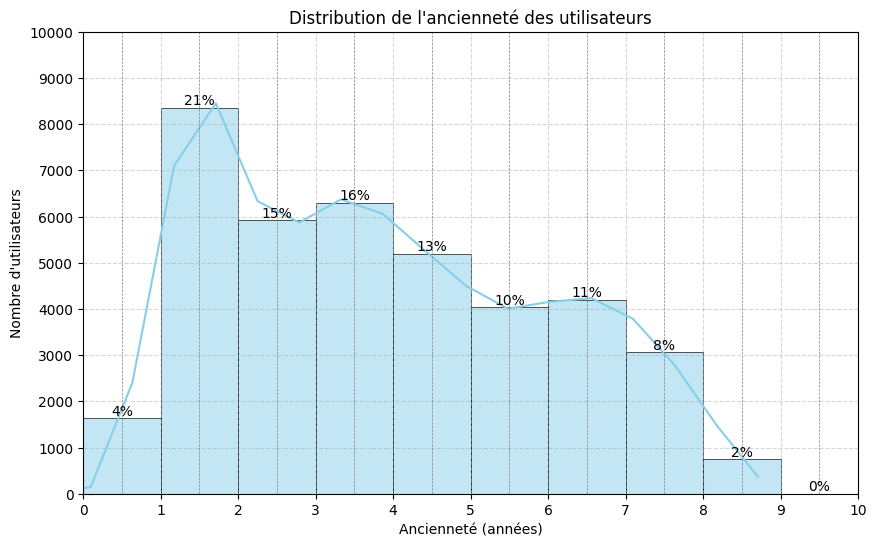

In [ ]:
from datetime import datetime

# Assuming we have an 'ACCOUNT_CREATION_DATE' column in users_data_cleaned
# with the users' account creation dates

# Calculate the users' tenure
users_data_cleaned['ACCOUNT_CREATION_DATE'] = pd.to_datetime(users_data_cleaned['ACCOUNT_CREATION_DATE'])
current_date = datetime.now()
users_data_cleaned['User_Age'] = (current_date - users_data_cleaned['ACCOUNT_CREATION_DATE']).dt.days / 365

# Visualize the distribution of user tenure
plt.figure(figsize=(10, 6))
ax = sns.histplot(users_data_cleaned['User_Age'], bins=range(0, 11, 1), kde=True, color='skyblue')

# Add gray vertical lines every six months
for year in range(0, 10):
    ax.axvline(x=year + 0.5, color='gray', linestyle='--', linewidth=0.5)

# Add percentages on top of the bars
total_users = users_data_cleaned.shape[0]
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total_users)  # Modified to remove decimals
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution de l\'ancienneté des utilisateurs')
plt.xlabel('Ancienneté (années)')
plt.ylabel('Nombre d\'utilisateurs')
plt.xticks(range(0, 11))
plt.yticks(range(0, 10001, 1000))  # Set upper limit on y-axis to 10,000 users
plt.xlim(0, 10)  # Set upper limit on x-axis to 10 years
plt.ylim(0, 10000)  # Set upper limit on y-axis to 10,000 users
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




In [ ]:
# Merge dataframes to get antiquity information
merged_data = pd.merge(users_data, watch_data, left_on='ID', right_on='USER_ID', how='inner')

# Convert account creation date to datetime
merged_data['ACCOUNT_CREATION_DATE'] = pd.to_datetime(merged_data['ACCOUNT_CREATION_DATE'])

# Calculate user antiquity in days
merged_data['USER_ANTIQUITY'] = (pd.to_datetime('now') - merged_data['ACCOUNT_CREATION_DATE']).dt.days

# Define antiquity ranges
antiquity_bins = [0, 730, 1460, 2190, 2920, float('inf')]  # Ranges: 0-2 years, 2-4 years, 4-6 years, 6-8 years, 8+ years
antiquity_labels = ['0-2 years', '2-4 years', '4-6 years', '6-8 years', '8+ years']

# Assign antiquity group to each user based on account creation date
merged_data['USER_ANTIQUITY_GROUP'] = pd.cut(merged_data['USER_ANTIQUITY'], bins=antiquity_bins, labels=antiquity_labels)

# Analyze content preference by antiquity group
content_preference_by_antiquity_group = merged_data.groupby(['USER_ANTIQUITY_GROUP', 'PROGRAM_KIND']).size().unstack(fill_value=0)

# Convert to percentage of users
total_users_by_antiquity_group = merged_data['USER_ANTIQUITY_GROUP'].value_counts()
content_preference_by_antiquity_group_percentage = content_preference_by_antiquity_group.div(total_users_by_antiquity_group, axis=0) * 100

# Define tenure groups and their explanations
tenure_groups = {
    "0-2 years": "Less than 2 years on the platform",
    "2-4 years": "Between 2 and 4 years on the platform",
    "4-6 years": "Between 4 and 6 years on the platform",
    "6-8 years": "Between 6 and 8 years on the platform",
    "8+ years": "More than 8 years on the platform"
}

# Create a table to display the top 5 preferred content types and their percentages within each tenure group
content_preference_table = []

for tenure_group, content_preferences in content_preference_by_antiquity_group_percentage.iterrows():
    top_5_contents = content_preferences.sort_values(ascending=False).head(5)
    total_users_in_group = total_users_by_antiquity_group.get(tenure_group, 0)
    for content, percentage in top_5_contents.items():
        content_preference_table.append([tenure_group, content, f'{percentage:.2f}%'])

# Sort the content preference table by tenure group and percentage of people
content_preference_table.sort(key=lambda x: (list(tenure_groups.keys()).index(x[0]), -float(x[2][:-1])))

# Display the table with properly aligned columns and visual separation between groups
print("TENURE GROUP         |   CONTENT PREFERRED    |   PERCENTAGE OF PEOPLE")
print("-" * 60)  # Horizontal line to separate header
for i, row in enumerate(content_preference_table):
    # Print tenure group with visual separation
    if i > 0 and content_preference_table[i][0] != content_preference_table[i-1][0]:
        print("-" * 60)  # Horizontal line between tenure groups
    print(f"{row[0]:<20} | {row[1]:<20} | {row[2]:>20}")


TENURE GROUP         |   CONTENT PREFERRED    |   PERCENTAGE OF PEOPLE
------------------------------------------------------------
0-2 years            | Informations         |               37.22%
0-2 years            | Séries               |               19.23%
0-2 years            | Films                |               10.62%
0-2 years            | Sport                |                9.81%
0-2 years            | Documentaires        |                9.63%
------------------------------------------------------------
2-4 years            | Informations         |               41.27%
2-4 years            | Séries               |               16.33%
2-4 years            | Films                |               10.33%
2-4 years            | Documentaires        |                9.11%
2-4 years            | Sport                |                9.01%
------------------------------------------------------------
4-6 years            | Informations         |               43.67%
4-6 years

# Devices and asset types analysis

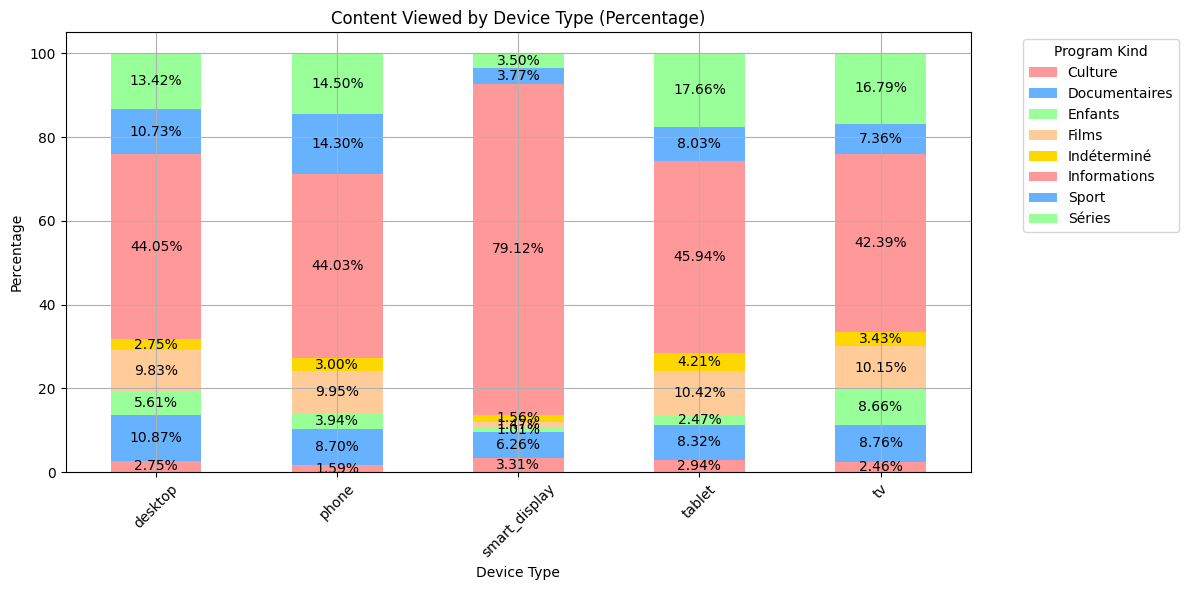

In [ ]:
# Calculate view percentage by device type
content_by_device = watch_data.groupby(['DEVICE_TYPE', 'PROGRAM_KIND']).size().unstack(fill_value=0)

content_by_device_percentage = content_by_device.div(content_by_device.sum(axis=1), axis=0) * 100

# Color pallete
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']

# Plot results
ax = content_by_device_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=pastel_colors)
plt.title('Content Viewed by Device Type (Percentage)')
plt.xlabel('Device Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Program Kind', bbox_to_anchor=(1.05, 1), loc='upper left')

# Percent of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


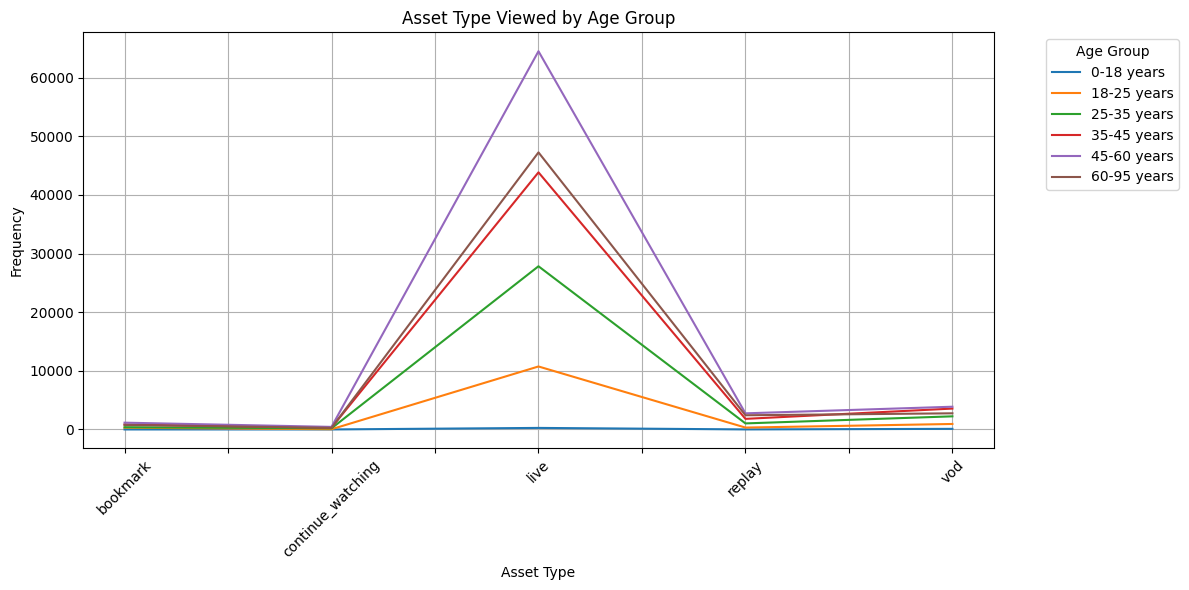

In [ ]:
# Asset by age range
asset_by_age_range = watch_data_with_age.groupby(pd.cut(watch_data_with_age['AGE'], bins=[x[0] for x in age_ranges] + [95], labels=age_labels))['ASSET_TYPE'].value_counts().unstack(fill_value=0)

# Transpose
asset_by_age_range_transposed = asset_by_age_range.T

# Plot results
asset_by_age_range_transposed.plot(kind='line', figsize=(12, 6))
plt.title('Asset Type Viewed by Age Group')
plt.xlabel('Asset Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


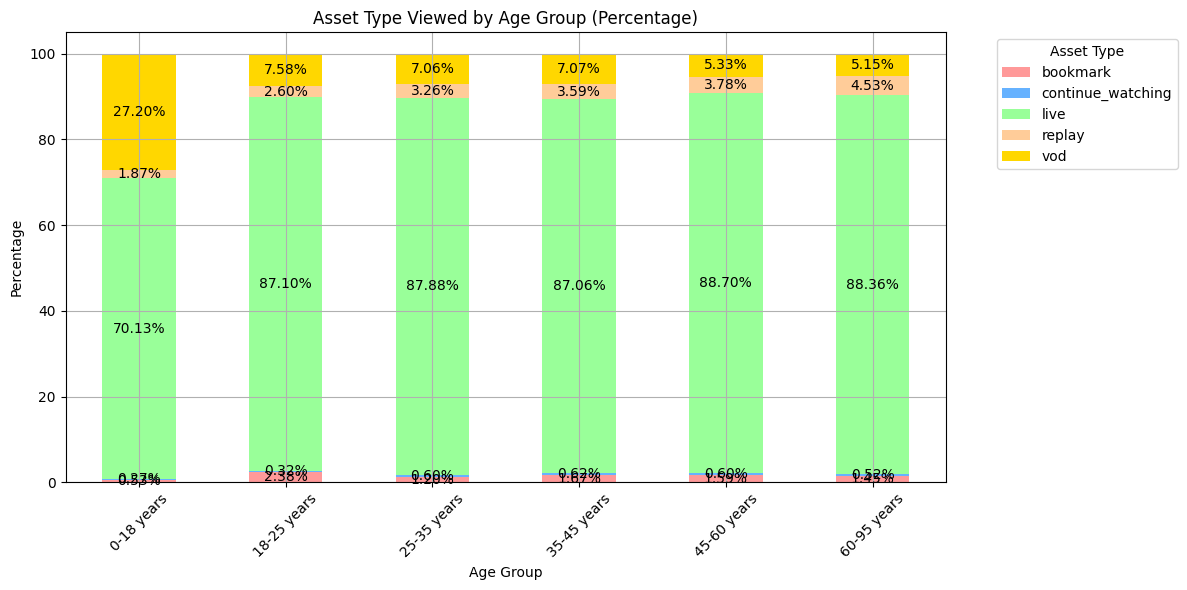

In [ ]:
# Asset type by age
total_by_age_range = asset_by_age_range.sum(axis=1)
asset_by_age_range_percentage = asset_by_age_range.div(total_by_age_range, axis=0) * 100

# Color palette
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']

# Plot resolts
ax = asset_by_age_range_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=pastel_colors)
plt.title('Asset Type Viewed by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Asset Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Percentages in bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


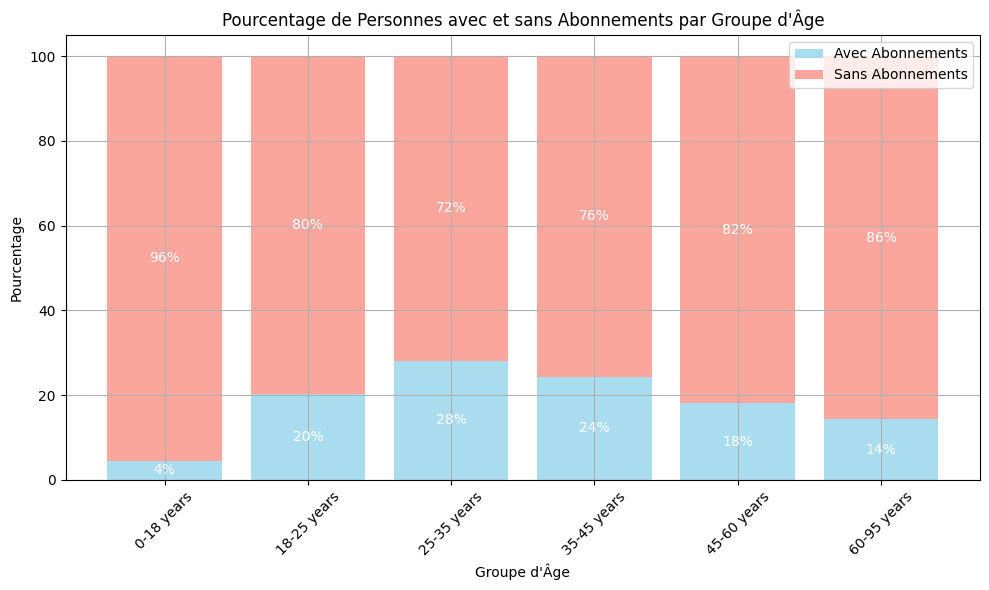

In [ ]:
# Function to assign age group labels
def get_age_group_label(age):
    for i, (start, end) in enumerate(age_ranges):
        if start <= age < end:
            return age_labels[i]
    return "Unknown"

# Apply the function to get the age group for each user
users_data_cleaned['AGE_GROUP'] = users_data_cleaned['AGE'].apply(get_age_group_label)

# Calculate the total count of users and users with subscriptions for each age group
age_group_counts = users_data_cleaned['AGE_GROUP'].value_counts().reindex(age_labels, fill_value=0)
age_group_subscription_counts = users_data_cleaned[users_data_cleaned['ID'].isin(subscriptions_data['USER_ID'])]['AGE_GROUP'].value_counts().reindex(age_labels, fill_value=0)

# Calculate the percentage of users with subscriptions for each age group
percentage_with_subscriptions = (age_group_subscription_counts / age_group_counts * 100).fillna(0)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars for users with subscriptions
plt.bar(age_labels, percentage_with_subscriptions, color='skyblue', label='Avec Abonnements', alpha=0.7)

# Plot the stacked bars for users without subscriptions on top of the previous bars
plt.bar(age_labels, 100 - percentage_with_subscriptions, bottom=percentage_with_subscriptions, color='salmon', label='Sans Abonnements', alpha=0.7)

# Add percentages for each age group
for i, (age_label, percentage) in enumerate(zip(age_labels, percentage_with_subscriptions)):
    plt.text(i, percentage / 2, f"{percentage:.0f}%", ha='center', va='center', color='white')
    plt.text(i, 100 - (100 - percentage) / 2, f"{100 - percentage:.0f}%", ha='center', va='center', color='white')

# Configure the chart
plt.title("Pourcentage de Personnes avec et sans Abonnements par Groupe d'Âge")
plt.xlabel('Groupe d\'Âge')
plt.ylabel('Pourcentage')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


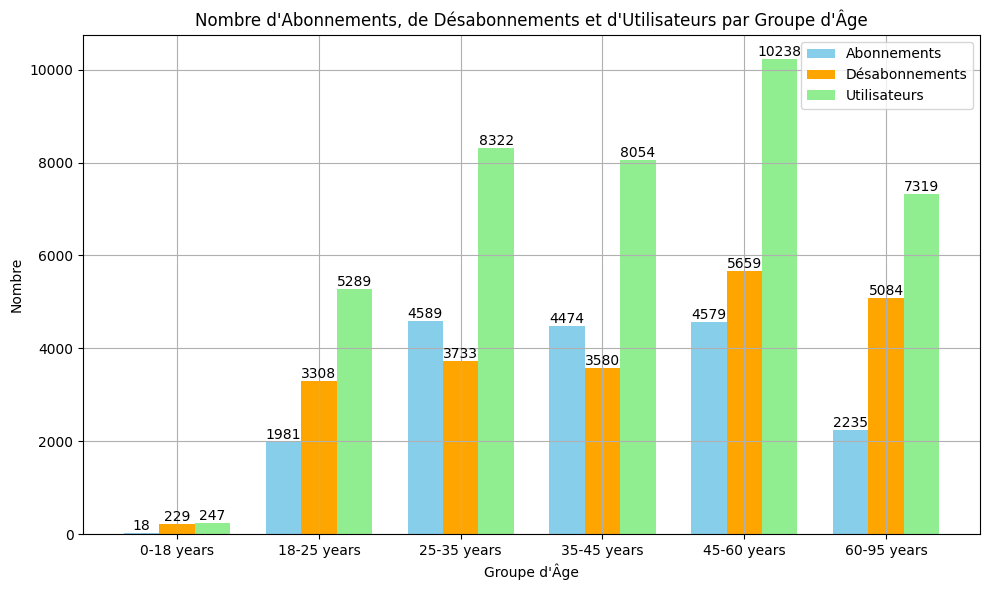

In [ ]:
# Calcular la cantidad de usuarios, suscripciones y desuscripciones por grupo de edad
age_group_user_counts = []
age_group_subscription_counts = []
age_group_desubscription_counts = []

for age_range in age_ranges:
    age_group = users_data_cleaned[(users_data_cleaned['AGE'] >= age_range[0]) & (users_data_cleaned['AGE'] < age_range[1])]
    age_group_users = len(age_group)

    # Contar las suscripciones en este grupo de edad
    subscriptions_in_age_group = subscriptions_data[subscriptions_data['USER_ID'].isin(age_group['ID'])]
    age_group_subscriptions = len(subscriptions_in_age_group)

    # Calcular desuscripciones restando suscripciones del total de usuarios en este grupo de edad
    age_group_desubscriptions = age_group_users - age_group_subscriptions

    # Agregar los recuentos a las listas respectivas
    age_group_user_counts.append(age_group_users)
    age_group_subscription_counts.append(age_group_subscriptions)
    age_group_desubscription_counts.append(age_group_desubscriptions)

# Preparar los datos para el gráfico
bar_width = 0.25
index = np.arange(len(age_labels))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Plotear las barras para las suscripciones
plt.bar(index - bar_width, age_group_subscription_counts, width=bar_width, color='skyblue', label='Abonnements')
for i, count in enumerate(age_group_subscription_counts):
    plt.text(i - bar_width, count, str(count), ha='center', va='bottom')

# Plotear las barras para las desuscripciones
plt.bar(index, age_group_desubscription_counts, width=bar_width, color='orange', label='Désabonnements')
for i, count in enumerate(age_group_desubscription_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Plotear las barras para los usuarios
plt.bar(index + bar_width, age_group_user_counts, width=bar_width, color='lightgreen', label='Utilisateurs')
for i, count in enumerate(age_group_user_counts):
    plt.text(i + bar_width, count, str(count), ha='center', va='bottom')

# Agregar etiquetas y título
plt.title('Nombre d\'Abonnements, de Désabonnements et d\'Utilisateurs par Groupe d\'Âge')
plt.xlabel('Groupe d\'Âge')
plt.ylabel('Nombre')
plt.xticks(index, age_labels)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


